## A complete guide to the functions in `python_funtranslate`

This guide shows
- how the functions were written
- how to use different arguements to get fun results

For a quick guide on the best features of this package, please refer to quick_guide.ipynb

In [1]:
import requests
import json

import os
import random
import re

import lxml
from lxml import html
from lxml import etree

import pandas as pd
import urllib.parse

In [2]:
languages = {
    # fictions
    'tolkien': ['sindarin', 'quenya'],
     'starwars': ['yoda', 'sith', 'gungan', 'huttese', 'mandalorian', 'cheunh'],
     'startrek': ['vulcan', 'klingon'],
     'gameofthrones': ['dothraki', 'valyrian'],
     'marvel': ['groot', 'minion'],

     # english varieties
     'englishes': ['oldenglish', 'shakespeare', 'post-modern', 'pirate'],
     
     # language games
     'wordgame': ['leetspeak', 'pig-latin', 'ferb-latin']}

In [3]:
languages_list = [val for key, values in languages.items() for val in values]
languages_list.append('morse') #special category

#### `get_full_description` function: Get the full description of one fun language by web scraping.

In [4]:
def get_full_description(language = 'leetspeak'):
    """
    Get the full description of one fun language by web scraping.

    Parameters
    ----------
    language: 
    String parameter, set as 'leetspeak' by default.

    Returns
    -------
    Returns a string of the language's full description
    Returns "no description" if the input language is not a part of the Fun Translation API website.

    Example
    --------
    >>>get_full_description()
    'Convert from English to Leet Speak. Leetspeak an informal language or code used on the Internet, in which standard letters are often replaced by numerals or special characters. It is also sometimes referred as H4X0R which is "Hacker" in leetspeak. Leet (or "1337"), also known as eleet or leetspeak, can be thought of as an alternative alphabet for the English language. It is used primarily on the Internet. It uses various combinations of ASCII characters to replace Latinate letters. For example, leet spellings of the word leet include 1337 and l33t; eleet may be spelled 31337 or 3l33t.'
    >>>get_full_description(language = 'post-modern')
    'Convert from plain English to Postmordern Speak. If you have the need to sound semiotic-ally and subliminally cool in party conversations we can help you! Our post-modern translator will make you the sophisticated conversationalist.'
    """
    web_url = f'https://funtranslations.com/{language}'
    web_html = requests.get(web_url)
    web_doc = html.fromstring(web_html.content)
    description = web_doc.xpath('//meta[@name="description"]/@content')
    if description:
        return description[0]
    else:
        return "no description"

#### `get_full_description` example: What does post-modern mean?

In [6]:
get_full_description(language = 'post-modern')

'Convert from plain English to Postmordern Speak. If you have the need to sound semiotic-ally and subliminally cool in party conversations we can help you! Our post-modern translator will make you the sophisticated conversationalist.'

#### `get_languages` function: Get short descriptions of all fun languages and their category.

In [5]:
def get_languages():
    """
    Get short descriptions of all fun languages and their category.
    
    """
    
    result = []
    for category, language_list in languages.items():
        for language in language_list:
            description = get_full_description(language)
            sentences = description.split('. ')
            new_description = '. '.join(sentences[1:2])
            result.append({"language": language, "description": new_description})
    df1 = pd.DataFrame(result)
    df2 = pd.DataFrame([(key, val) for key, values in languages.items() for val in values], columns=['category', 'language'])
    df = pd.merge(df2, df1, on='language')
    return df

#### `get_languages` example: Wait what are the available languages?

In [14]:
df = get_languages()
df

,category,language,description
0,tolkien,sindarin,Sindarin is one of the many languages spoken b...
1,tolkien,quenya,Quenya is one of the many languages spoken by ...
2,starwars,yoda,Yoda often orders sentences as Object-Subject-...
3,starwars,sith,The Sith language was the native language of t...
4,starwars,gungan,Star Wars is a Disney Movie and the related c...
5,starwars,huttese,"Huttese was the language spoken by the Hutts, ..."
6,starwars,mandalorian,Mando'a was the language of the people native ...
7,starwars,cheunh,Cheunh was the official language of the Chiss
8,startrek,vulcan,The Vulcan language was spoken by the Vulcans ...
9,startrek,klingon,The Klingons are a fictional extraterrestrial ...


#### `get_translation_json` function: Translate input text into one fun target language and returns the json format of API client request.

In [6]:
def get_translation_json(in_text = 'Hello World!', target_language = 'random'):
    """
    Translate input text into one fun target language and returns the json format of API client request.

    Parameters
    ----------
    in_text: 
    String parameter, set as 'Hello World!' by default.
    Strongly recommended in_text language: English

    target_language:
    String parameter, set as "random" by default.
    Use the function get_languages() for more information on available target languages.
    
    Returns
    -------
    Returns the json format of API client request

    Example
    --------
    >>>get_translation_json()
    {'success': {'total': 1},
    'contents': {'translated': "Hello qo'!",
    'text': 'Hello World!',
    'translation': 'klingon'}}
    """
    
    url_text = urllib.parse.quote(in_text)

    if target_language == 'random':
        category = random.choice(list(languages.keys()))
        target_language = random.choice(languages[category])
    url = f'https://api.funtranslations.com/translate/{target_language}.json?text={url_text}'
    headers = {'X-Funtranslations-Api-Secret': API_KEY}
    r1 = requests.get(url, headers=headers)
    #r1 = requests.get(
        #f'https://api.funtranslations.com/translate/{target_language}.json?text={url_text}')
    fun_json1 = r1.json()
    return fun_json1
    

#### `get_translation_json` example: What would Worf say?

In [162]:
get_translation_json()

{'success': {'total': 1},
 'contents': {'translated': 'Hello visuom!',
  'text': 'Hello World!',
  'translation': 'sith'}}

#### `get_hard2read` function: Turn your input into a secret code by translating it twice.

In [7]:
def get_hard2read(in_text = 'How hard can it be?', lan1 = 'minion', lan2 = 'leetspeak'):
    """
    Turn your input into a secret code by translating it twice.

    Parameters
    ----------
    in_text: 
    String parameter, set as 'How hard can it be?' by default.
    Strongly recommended in_text language: English

    lan1:
    String parameter, set as 'minion' by default.
    This is the language your input firstly gets translated into.
    Use the function get_languages() for more information on available target languages.

    lan2:
    String parameter, set as 'leetspeak' by default.
    This is the language your input eventually gets translated into.
    Strongly recommended lan2: leetspeak, pig-latin, ferb-latin, morse
    
    Returns
    -------
    Returns a string as a secret code.
    Returns False if the input is not correct.
    Returns nothing if the request fails.

    Example
    --------
    >>>get_hard2read()
    '4m3e 0W PUdum p!K 83?'
    >>>get_hard2read(lan1 = "newspeak")
    False
    """

    if type(lan1) != str or lan1.lower() not in languages_list or type(lan2) != str or lan2.lower() not in languages_list:
        return False
    
    json1 = get_translation_json(in_text = in_text, target_language = lan1)
    if list(json1.keys())[0] != 'success': return
    text2 = json1['contents']['translated']
    json2 = get_translation_json(in_text = text2, target_language = lan2)
    if list(json1.keys())[0] != 'success': return
    return json2['contents']['translated']

#### `get_hard2read` example: How to generate a mysterious code?

In [177]:
get_hard2read()

'4m3e 0W PUdum p!K 83?'

In [178]:
get_hard2read(lan1 = 'sindarin', lan2 = 'ferb-latin')

'ow-Herb róvan tur- ha n-? '

In [238]:
get_hard2read(lan1 = 'pirate', lan2 = 'morse')

'.... --- .--     .... .- .-. -..     -.-. .- -.     .. -     -... . ..--.. '

#### `get_translation` function: Get some fun translations in a pd dataframe format.

In [8]:
def get_translation(
    in_text = """Some say the world will end in fire,
    Some say in ice.
    From what I’ve tasted of desire
    I hold with those who favor fire.
    But if it had to perish twice,
    I think I know enough of hate
    To say that for destruction ice
    Is also great
    And would suffice.""", 
    target_languages = ['klingon'],
    by_sentence = False):
    
    """
    Get some fun translations in a pd dataframe format.

    Parameters
    ----------
    in_text: 
    String parameter, set as a short poem by Robert Frost by default.
    Strongly recommended in_text language: English

    target_languages:
    List parameter, set as ['klingon'] by default.
    Put all fun languages you want the in_text to be translated into!
    However, users of public endpoint without an API key have a rate limit. Be careful!

    by_sentence:
    Boolean parameter, set as False by default.
    Decides whether the output is separated by sentences.
    Yoda speak and morse code cannot be seperated by sentence.
    
    Returns
    -------
    Returns a dataframe that contains the input text, the translated text, and the corresponding fun language of the translated text.

    Example
    --------
    get_translation(target_languages = ['klingon', 'sith'])
    >>> Sentence	Translated	Translation
    0	Some say the world will end in fire, Some say ...	'op jatlh the qo' will van in qul, 'op jatlh ...	klingon
    1	Some say the world will end in fire, Some say ...	Kair zodis tave visuom valia qorit kash saud, ...	sith
    
    """
    

    in_text = in_text.replace('\n', ' ')
    in_text = re.sub(r'\s+', ' ', in_text)

    in_list = []
    out_list = []
    lan_list = []
    df = pd.DataFrame({'Sentence':[], 'Translated': [], 'Translation': []})

    if type(target_languages) != list:
        return False
        
    else:
        for target in target_languages:
            if type(target) != str or target.lower() not in languages_list:
                continue
                
            else:
                json = get_translation_json(in_text = in_text, target_language = target.lower())

            if list(json.keys())[0] != 'success':
                in_list.append(in_text)
                out_list.append('')
                lan_list.append(target)
                continue
                
            if by_sentence == True:
                sentences1 = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', json['contents']['text'])
                sentences2 = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', json['contents']['translated'])
                df1 = pd.DataFrame({'Sentence': sentences1, 'Translated': sentences2, 'Translation': json['contents']['translation']})
                df = pd.concat([df, df1])

            else:
                in_list.append(json['contents']['text'])
                out_list.append(json['contents']['translated'])
                lan_list.append(json['contents']['translation'])
                
            data = {'Sentence': in_list, 'Translated': out_list, 'Translation': lan_list}
            df_data = pd.DataFrame(data)
            
        if by_sentence == False: return df_data
        else: return df
    

#### `get_translation` examples:

In [239]:
get_translation()

,Sentence,Translated,Translation
0,"Some say the world will end in fire, Some say ...","'op jatlh the qo' will van in qul, 'op jatlh ...",klingon


In [174]:
get_translation(target_languages = ['klingon', 'sith'],by_sentence = True)

,Sentence,Translated,Translation
0,"Some say the world will end in fire, Some say ...","'op jatlh the qo' will van in qul, 'op jatlh ...",klingon
1,From what I’ve tasted of desire I hold with th...,From nuqjatlh jih’ve tasted of neh jih 'uch wi...,klingon
2,"But if it had to perish twice, I think I know ...","'ach if 'oh had to perish cha'logh, jih qub j...",klingon
0,"Some say the world will end in fire, Some say ...","Kair zodis tave visuom valia qorit kash saud, ...",sith
1,From what I’ve tasted of desire I hold with th...,Sulig kam nu’ve skoniji iv svajone nu galia su...,sith
2,"But if it had to perish twice, I think I know ...","Kad ar zhol zin kia perish twice, nu minti nu...",sith


In [176]:
get_translation(target_languages = ['pirate', 'd'],by_sentence = True)

,Sentence,Translated,Translation
0,"Some say the world will end in fire, Some say ...","Some say th' world will end in fire, Some say ...",pirate
1,From what I’ve tasted of desire I hold with th...,From what I’ve tasted o' desire I hold with t...,pirate
2,"But if it had to perish twice, I think I know ...","But if it had t' perish twice, I think I be k...",pirate


#### `sentence_similarity` function: Calculate the percentage of similarity between two sentences.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
def sentence_similarity(sentence1, sentence2):
    """
    Calculate the percentage of similarity between two sentences.
    
    """
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([sentence1, sentence2])
    similarity_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
    return similarity_score

#### `sentence_similarity` example: Usually there is no need to use it directly; it is necessary for another function.

In [27]:
sentence_similarity("Python great a e", "Python bad noo we")

0.22028815056182974

#### `similarity_matrix` function: Generate a matrix for the compare_fun_languages function

In [11]:
def similarity_matrix(sentences):
    """
    Generate a matrix for the compare_fun_languages function
    
    """
    n = len(sentences)
    matrix = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            matrix[i][j] = sentence_similarity(sentences[i], sentences[j])
    return matrix

#### `sentence_similarity` example: As suggested aboove, usually there is no need to use it directly; it serves for another function.

no example

#### `compare_fun_languages` function:  Compare some fun translations by looking at their similarity heatmap, their similarity matrix, or simply the translation result gathered in a pd dataframe.

In [12]:
def compare_fun_languages(in_text = """Beautiful is better than ugly.
    Explicit is better than implicit.
    Simple is better than complex.
    Complex is better than complicated.
    Flat is better than nested.
    Sparse is better than dense.
    Readability counts.
    Special cases aren't special enough to break the rules.
    Although practicality beats purity.
    Errors should never pass silently.
    Unless explicitly silenced.
    In the face of ambiguity, refuse the temptation to guess.
    There should be one-- and preferably only one --obvious way to do it.
    Although that way may not be obvious at first unless you're Dutch.
    Now is better than never.
    Although never is often better than *right* now.
    If the implementation is hard to explain, it's a bad idea.
    If the implementation is easy to explain, it may be a good idea.
    Namespaces are one honking great idea -- let's do more of those!""", 
    target_languages = ['sindarin', 'yoda', 'vulcan', 'dothraki', 'groot', 'oldenglish', 'leetspeak'],
    heatmap = True, mapnote = False):

    
    """
    Compare some fun translations by looking at their similarity heatmap, their similarity matrix, or simply the translation result gathered in a pd dataframe.

    Parameters
    ----------
    in_text: 
    String parameter, set as Zen of Python by default.
    Strongly recommended in_text language: English

    target_languages:
    List parameter, set as ['sindarin', 'yoda', 'vulcan', 'dothraki', 'groot', 'oldenglish', 'leetspeak'] by default.
    Put all fun languages you want the in_text to be translated into!
    However, users of public endpoint without an API key have a rate limit. Be careful!

    heatmap:
    Boolean parameter, set as True by default.
    decides whether show a graph that compares fun languages.

    mapnote:
    Boolean parameter, set as False by default.
    decides the graph displays the specific numbers of sentence similarity.
    
    Returns
    -------
    return[0]: a dataframe that contains the input text, the translated text, and the corresponding fun language of the translated text.
    return[1]: a matrix of sentence similarity
    if hearmap == True, there will be a return[2], which is the heatmap graph.

    """

    
    df = get_translation(in_text = in_text, target_languages = target_languages, by_sentence = False)
    sentences = list(df['Translated'])
    sentences.append(in_text)
    lans = list(df['Translation'])
    lans.append('input language')
    matrix = similarity_matrix(sentences)
    if heatmap == True:
        graph = sns.heatmap(matrix, annot= mapnote, xticklabels=lans, yticklabels=lans)
        graph.set_title('Language Similarity Heatmap')
        plt.show()
        return df, matrix, graph
    return df, matrix

#### `compare_fun_languages` examples:

In [230]:
a = compare_fun_languages(target_languages = ['sindarin', 'dothraki', 'groot', 'leetspeak'], heatmap = False)

In [231]:
a[0]

,Sentence,Translated,Translation
0,Beautiful is better than ugly. Explicit is bet...,Beautiful na- better than uglui. Explicit na- ...,sindarin
1,Beautiful is better than ugly. Explicit is bet...,Zheana is better than ugly. Explicit is better...,dothraki
2,Beautiful is better than ugly. Explicit is bet...,I am groot. I am groot. I am groot. I am groot...,groot
3,Beautiful is better than ugly. Explicit is bet...,b34U7|phUl |s b37tEr than UG1y. 3kzplIC|7 !s B...,leetspeak


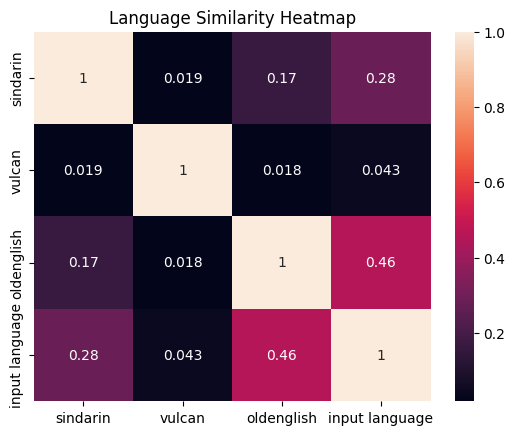

In [234]:
b = compare_fun_languages(target_languages = ['sindarin', 'vulcan', 'oldenglish'], mapnote = True)

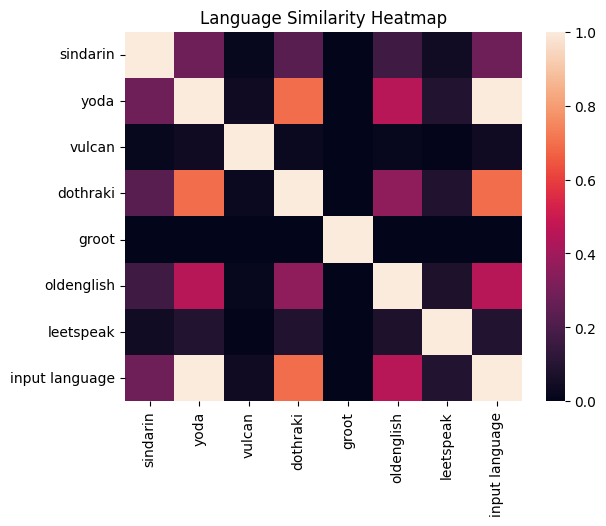

In [235]:
c = compare_fun_languages()

### Pytest results (screenshot):

![This is the pytest result I get from my terminal](pytest.png)